In [56]:
'''import libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [57]:
%matplotlib inline

In [58]:
'''import data'''
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target,columns=['actual'])

In [59]:
'''data analysis'''
# np.std(X['mean area'])
X.describe()
# y.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


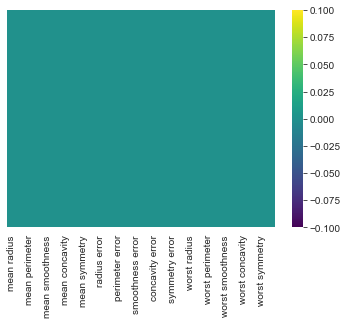

In [60]:
'''checking missing values in the data'''
sns.heatmap(data=X.isnull(),yticklabels=False,cmap='viridis')
#---> No missing data

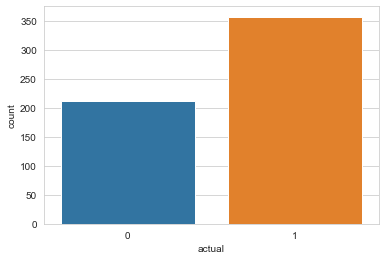

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='actual',data=y)

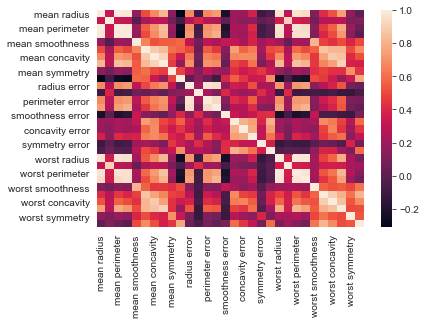

In [62]:
'''correlation'''
sns.heatmap(data=X.corr())

In [63]:
'''scaling the features'''
def scale_feauture(x):
    '''assuming x is a data frame'''
    mean = np.mean(x)
    std = np.std(x)
    x = (x - mean)/std
    return x
X_scale = X.apply(lambda x: scale_feauture(x))

In [64]:
# '''splitting the data'''
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

'''splitting the data'''
m = y.shape[0]
num_train = int(0.6*m)
num_cv = int(0.2*m)
num_test = m - num_train - num_cv
np.random.seed(101)


shuffle_index = np.random.permutation(X_scale.index)
X_train = X_scale.iloc[shuffle_index[:num_train]]
y_train = y.iloc[shuffle_index[:num_train]]

X_cv = X_scale.iloc[shuffle_index[num_train : num_train+num_cv]]
y_cv = y.iloc[shuffle_index[num_train : num_train+num_cv]]

X_test = X_scale.iloc[num_train+num_cv:]
y_test = y.iloc[num_train+num_cv:]

# Logistic Regression

In [65]:
'''Using the logistic regression'''
lambda_ = 0.1
alpha = 0.1
#create an instance
logmodel = LogisticRegression(C = 1/lambda_)

#train the model
logmodel.fit(X_train,y_train.values.ravel())
pred_train = logmodel.predict(X_train)
pred_cv = logmodel.predict(X_cv)
pred_test = logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print("performance on cross validation set\n",classification_report(y_cv,pred_cv))

#rows True values
#columnes Predicted values
#        Pred_T  Pred_F
# act_T   TP      FN
# act_F   FP      TN
print("Confusion Matrix for test set\n")
confusion_matrix(y_test,pred_test)
print("performance on Test set\n",classification_report(y_test,pred_test))


performance on cross validation set
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.99      0.99      0.99        77

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113

Confusion Matrix for test set

performance on Test set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        89

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



# Support Vector Machines (SVM)

In [69]:
from sklearn.svm import SVC
svm_model = SVC()
#Sigmoid function
#variance
gamma = 1

#Regularization
lambda_ = 0.1

# svm_model.fit(X_train,y_train,kernal:'Sigmoid',C=1/lambda_,gamma = gamma)

In [ ]:
svm_model.fit()